# Analysis of the vemurafenib trial

This notebook reproduces the analysis of the vemurafenib trial in the [RoBoT paper](https://academic.oup.com/biostatistics/article/22/4/897/5736525), but using simpler models.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, EmpiricalSite
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF, MODEL_INDEPENDENT, MODEL_BHM

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 1

### Generate data

In [8]:
K = 6    # the number of groups
p0 = 0.15 # null response rate
p1 = 0.45 # target response rate

evaluate_interim = [True]
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
basket_info = np.array([
    ['ATC', 2, 7],
    ['ECD/LC', 6, 14],
    ['CCA', 1, 8],
    ['CRC-V', 1, 26],
    ['CRC-V', 0, 10],
    ['NSCLC', 8, 19]
])

site_names = basket_info[:, 0]
num_responses = basket_info[:, 1].astype(int)
sample_sizes = basket_info[:, 2].astype(int)
site = EmpiricalSite(site_names, num_responses, sample_sizes)
site

EmpiricalSite for ['ATC' 'ECD/LC' 'CCA' 'CRC-V' 'CRC-V' 'NSCLC']

In [10]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = False
early_efficacy_stop = False

In [11]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff,
              early_futility_stop=early_futility_stop,
              early_efficacy_stop=early_efficacy_stop,              
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-20 13:40:43.094 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-20 13:40:43.095 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 2/7 for Analysis independent
2023-06-20 13:40:43.095 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 2/7 for Analysis BHM
2023-06-20 13:40:43.096 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 6/14 for Analysis independent
2023-06-20 13:40:43.096 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 6/14 for Analysis BHM
2023-06-20 13:40:43.096 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 1/8 for Analysis independent
2023-06-20 13:40:43.096 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 1/8 for Analysis BHM
2023-06-20 13:40:43.097 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 1/26 for Analysis independent
2023-06-20 13:40:43.097 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 1/26 for Anal

### Check last results

### Independent

In [12]:
analysis_name = analysis_names[0]
analysis_name

'independent'

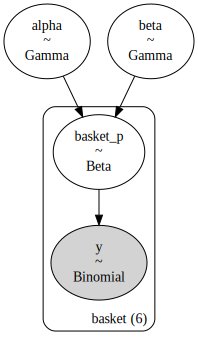

In [13]:
trial.visualise_model(analysis_name)

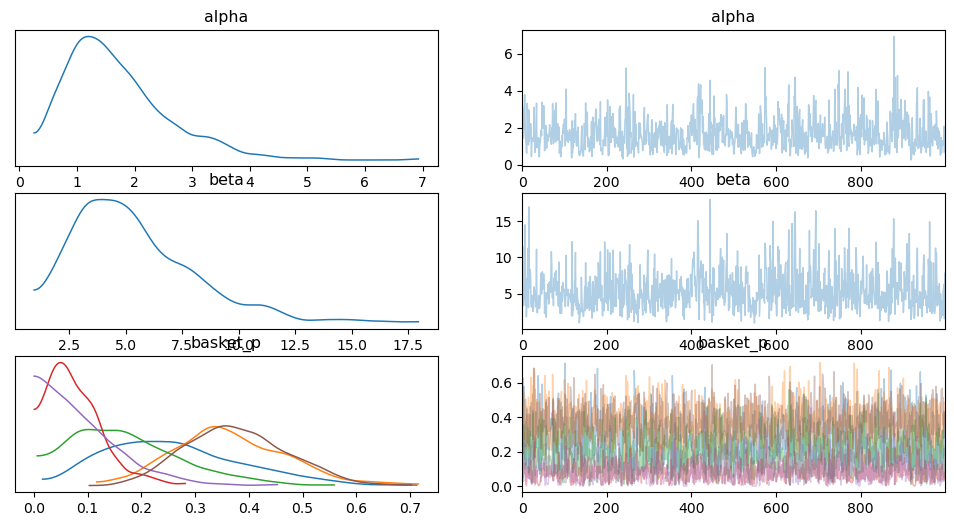

In [14]:
trial.plot_trace(analysis_name, -1)

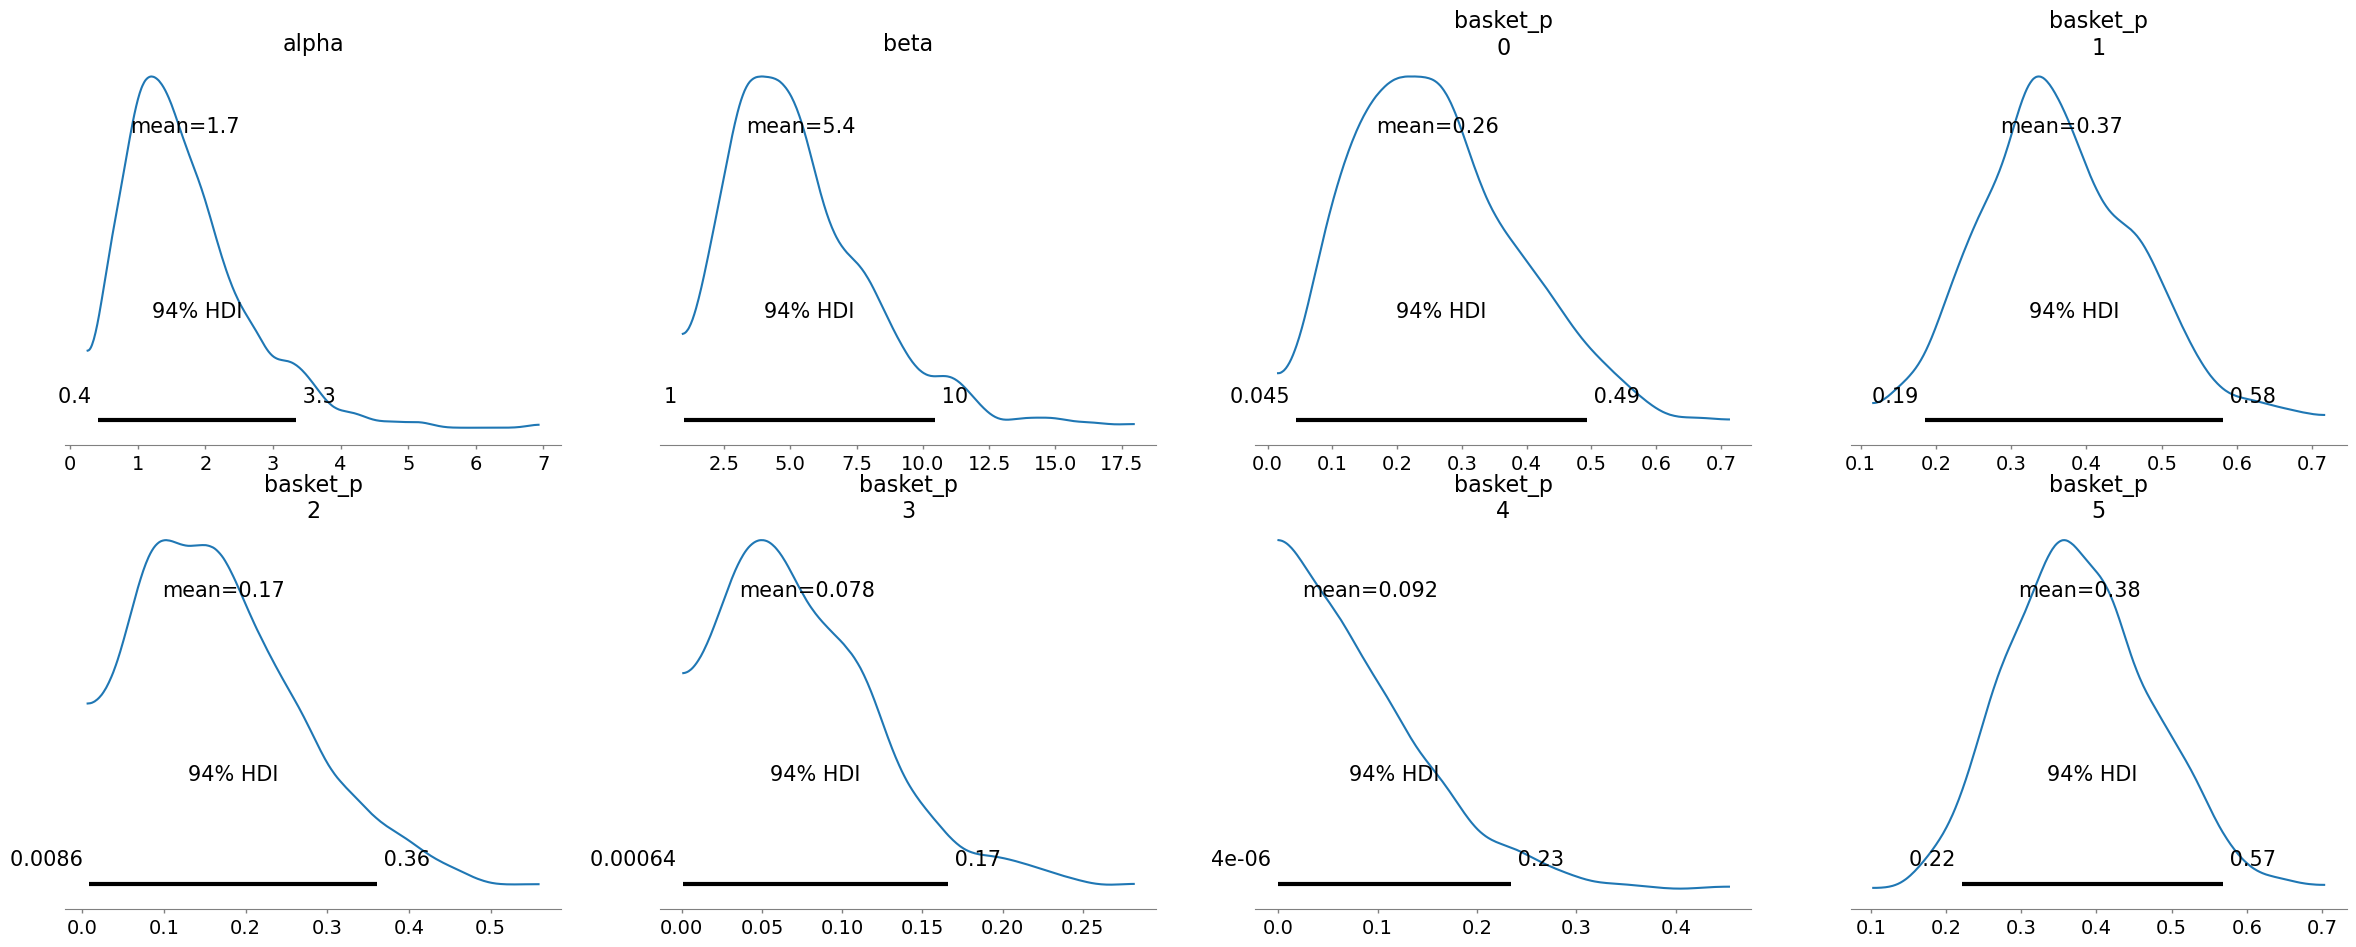

In [15]:
trial.plot_posterior(analysis_name, -1)

In [16]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19


### BHM

In [17]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

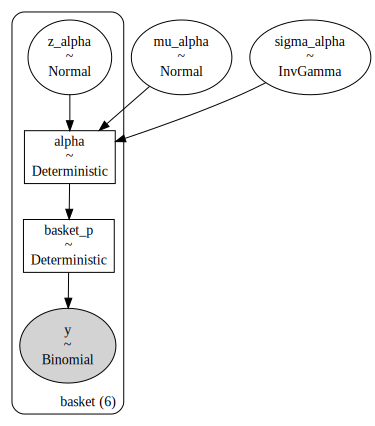

In [18]:
trial.visualise_model(analysis_name)

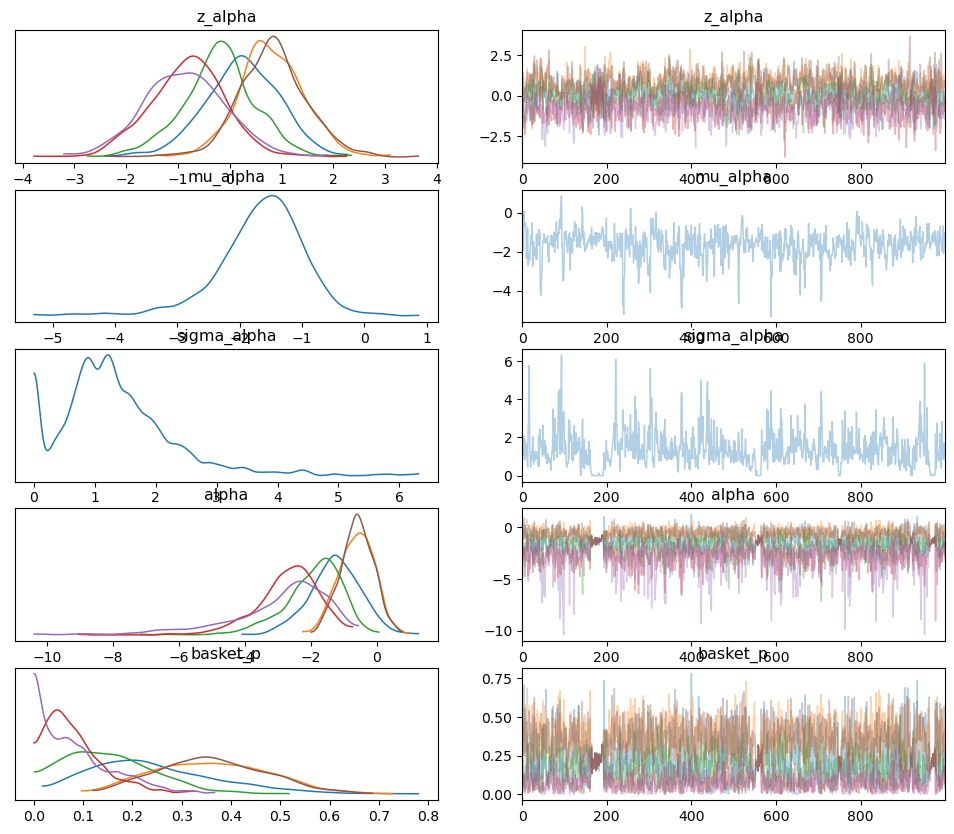

In [19]:
trial.plot_trace(analysis_name, -1)

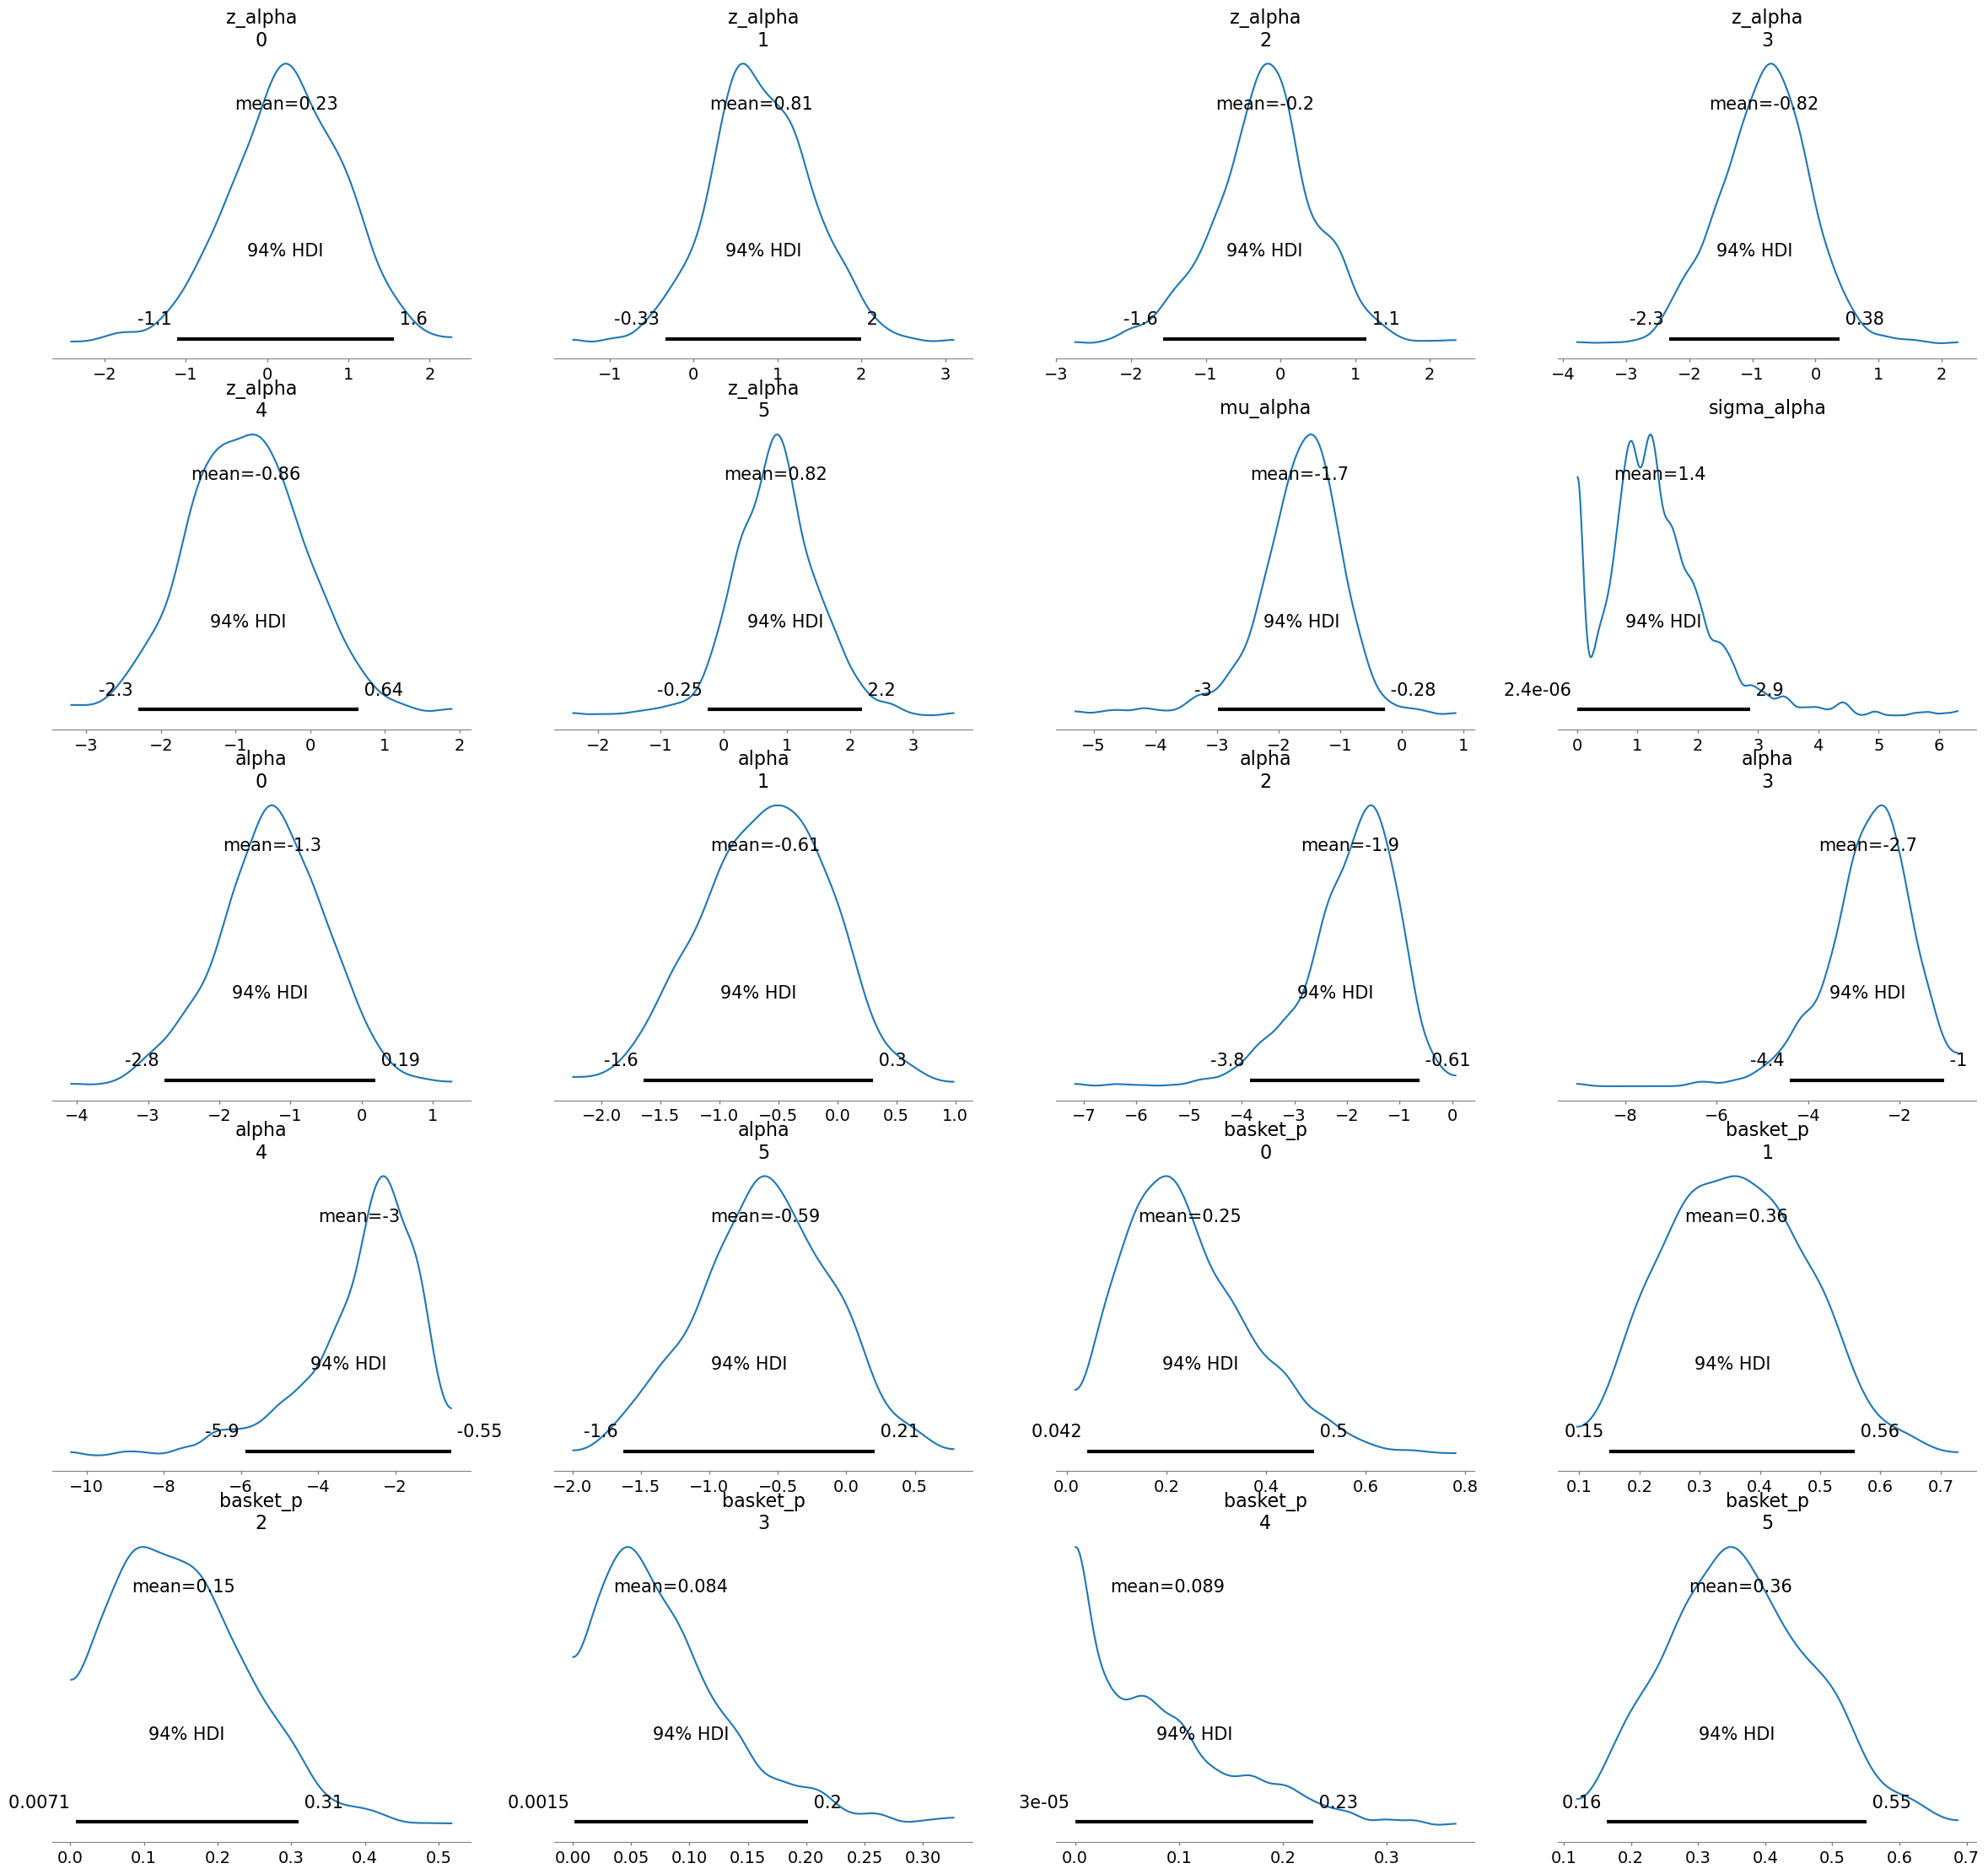

In [20]:
trial.plot_posterior(analysis_name, -1)

In [21]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,2,7
1,COMPLETED_EFFECTIVE,6,14
2,COMPLETED_INEFFECTIVE,1,8
3,COMPLETED_INEFFECTIVE,1,26
4,COMPLETED_INEFFECTIVE,0,10
5,COMPLETED_EFFECTIVE,8,19
